### Train model using PCA Components

In [1]:
# install xgboost
!pip install xgboost==1.7.2

In [2]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [12]:
columns_list_file = 'bike_train_column_list_pca.txt'
train_file = 'bike_train_pca.csv'
validation_file = 'bike_validation_pca.csv'
test_file = 'bike_test_pca.csv'

In [13]:
columns = ''
with open(columns_list_file,'r') as f:
    columns = f.read().split(',')

In [14]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour',
 'component_0',
 'component_1']

In [15]:
df_train = pd.read_csv(train_file, names=columns)
df_validation = pd.read_csv(validation_file, names=columns)

In [16]:
df_train.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,4.477337,3,0,0,2,2011,9,3,5,0,-0.024157,-0.117305
1,5.517453,3,0,1,1,2012,8,13,0,14,0.421581,-0.206154


In [17]:
df_validation.head(2)

,count,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,6.095825,3,0,1,2,2011,7,7,3,8,0.000338,-0.064822
1,5.961005,2,0,0,1,2011,6,11,5,13,0.225850,-0.105773


In [18]:
df_train.iloc[:,1:].head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,3,0,0,2,2011,9,3,5,0,-0.024157,-0.117305
1,3,0,1,1,2012,8,13,0,14,0.421581,-0.206154


In [19]:
df_train.iloc[:,1:-2].head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour
0,3,0,0,2,2011,9,3,5,0
1,3,0,1,1,2012,8,13,0,14


In [20]:
X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0].ravel()

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [44]:
# XGBoost Training Parameters
regressor =xgb.XGBRegressor(max_depth=5, eta=0.1, subsample=0.7, n_estimators=150)

In [45]:
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [46]:
regressor.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:3.90562	validation_1-rmse:3.91547
[1]	validation_0-rmse:3.52689	validation_1-rmse:3.53416
[2]	validation_0-rmse:3.18650	validation_1-rmse:3.19187
[3]	validation_0-rmse:2.87947	validation_1-rmse:2.88380
[4]	validation_0-rmse:2.60370	validation_1-rmse:2.60718
[5]	validation_0-rmse:2.35787	validation_1-rmse:2.36047
[6]	validation_0-rmse:2.13676	validation_1-rmse:2.13887
[7]	validation_0-rmse:1.93724	validation_1-rmse:1.94010
[8]	validation_0-rmse:1.75952	validation_1-rmse:1.76256
[9]	validation_0-rmse:1.59888	validation_1-rmse:1.60167
[10]	validation_0-rmse:1.45671	validation_1-rmse:1.45932
[11]	validation_0-rmse:1.32968	validation_1-rmse:1.33241
[12]	validation_0-rmse:1.21548	validation_1-rmse:1.21887
[13]	validation_0-rmse:1.10761	validation_1-rmse:1.11197
[14]	validation_0-rmse:1.01626	validation_1-rmse:1.02119
[15]	validation_0-rmse:0.93637	validation_1-rmse:0.94201
[16]	validation_0-rmse:0.86503	validation_1-rmse:0.87154
[17]	validation_0-rmse:0.79990	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [47]:
eval_result = regressor.evals_result()

In [48]:
eval_result

{'validation_0': OrderedDict([('rmse',
               [3.905619296176049,
                3.5268918439005543,
                3.18649861080567,
                2.879472714149149,
                2.603698347790527,
                2.3578692930292036,
                2.136756547540868,
                1.9372404742369067,
                1.7595168611009904,
                1.5988757298488752,
                1.4567112140461393,
                1.329684947174703,
                1.2154776642105873,
                1.1076098900013398,
                1.0162562752071216,
                0.9363716987776614,
                0.8650290318449533,
                0.7998997255726946,
                0.7389345760096124,
                0.6873387080192341,
                0.6422041415819808,
                0.6020821848226602,
                0.5695007258547998,
                0.536471837218514,
                0.5093152803383959,
                0.48591936931548163,
                0.46421191939480

In [49]:
training_rounds =  range(len(eval_result['validation_0']['rmse']))

In [50]:
training_rounds

range(0, 150)

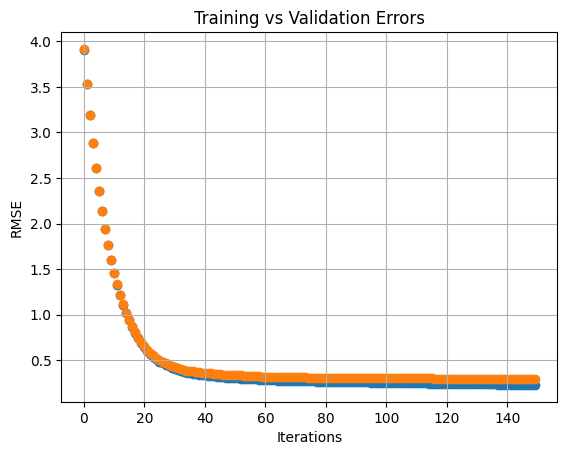

In [52]:
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training vs Validation Errors')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

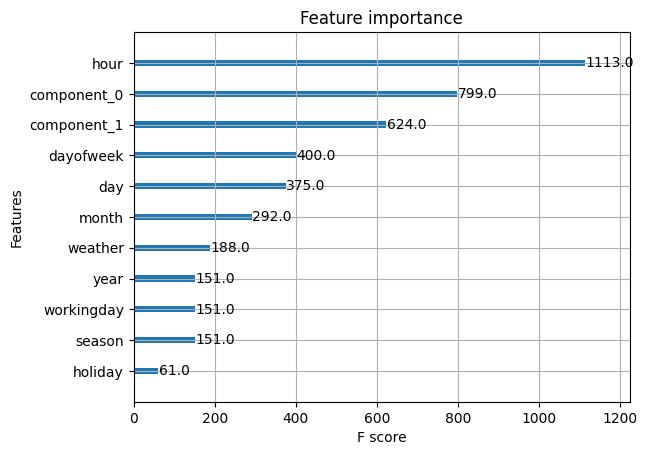

In [53]:
xgb.plot_importance(regressor)

In [54]:
# Prepare Data for submission to kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [55]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-0.103577,0.275370
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-0.236760,-0.119577


In [56]:
X_test = df_test.iloc[:,1:] #Excludes datetime

In [57]:
X_test.head(2)

,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1
0,1,0,1,1,2011,1,20,3,0,-0.103577,0.275370
1,1,0,1,1,2011,1,20,3,1,-0.236760,-0.119577


In [58]:
result = regressor.predict(X_test)

In [59]:
result[:5]

array([2.3784804, 2.0100076, 1.5464848, 1.1762208, 1.1113523],
      dtype=float32)

In [61]:
df_test['count'] = np.expm1(result)

In [62]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-0.103577,0.275370,9.788496
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-0.236760,-0.119577,6.463374


In [65]:
df_test[df_test['count']<0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count


In [66]:
def adjust_count(x):
    if x<0:
        return 0
    else:
        return x

In [67]:
df_test['count'] = df_test['count'].map(adjust_count)

In [68]:
df_test.head(2)

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count
0,2011-01-20 00:00:00,1,0,1,1,2011,1,20,3,0,-0.103577,0.275370,9.788496
1,2011-01-20 01:00:00,1,0,1,1,2011,1,20,3,1,-0.236760,-0.119577,6.463374


In [69]:
df_test[df_test['count']<0]

,datetime,season,holiday,workingday,weather,year,month,day,dayofweek,hour,component_0,component_1,count


In [70]:
df_test[['datetime','count']].to_csv('normalized_pca_local_predicted_count.csv',index=False)